In [1]:
#memory that we can use
!free -h --si | awk  '/Mem:/{print $2}'
#GPU count and name
!nvidia-smi

13G
Mon Jan 25 06:35:36 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P8    10W /  75W |      0MiB /  7611MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+---

In [2]:
import sys
import os
mp = os.path.abspath(os.path.join('/content/drive/My Drive/GraduationThesis/gitrepo/GT_IGR/'))
sys.path.append(mp)

In [3]:
import torch
from modules import Reconstruction, Visualization, Utils, Network

In [4]:
# GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
# Define data set name and constraint type
dataset_name = 'stanford-bunny'
constraint_name = 'Eikonal'
prev_iteration = 10000
iteration = 10000
batch_size = 16384

In [6]:
# Load points from file
filename = mp + '/dataset/3d/' + dataset_name + '.xyz'
dataset, normal_vectors = Utils.read_txt3(filename, device=device)

In [7]:
traineddata_path = mp + '/models/' + dataset_name + '_' + constraint_name + '_' + str(prev_iteration) + '.traineddata'
model, optimizer, scheduler = Network.load_model(traineddata_path, dimension=3, device=device)

Model loaded


Setting up
Loss values loaded
Getting distance to 50th closest neighbor
Getting sampling range

Training
Iteration: 10100   Loss: 0.07373674213886261   Learning rate: 3.125e-05
Surface loss: 0.0002459269016981125   Normal loss: 0.002942283870652318   Constraint: 0.7054853439331055

Iteration: 10200   Loss: 0.07375113666057587   Learning rate: 3.125e-05
Surface loss: 5.9861453337362036e-05   Normal loss: 0.0030735014006495476   Constraint: 0.7061777114868164

Iteration: 10300   Loss: 0.07329728454351425   Learning rate: 3.125e-05
Surface loss: 9.827475878410041e-05   Normal loss: 0.002961436752229929   Constraint: 0.7023756504058838

Iteration: 10400   Loss: 0.0736096128821373   Learning rate: 3.125e-05
Surface loss: 0.00025323525187559426   Normal loss: 0.003027241211384535   Constraint: 0.7032913565635681

Iteration: 10500   Loss: 0.07352487742900848   Learning rate: 3.125e-05
Surface loss: 6.278428190853447e-05   Normal loss: 0.00291161029599607   Constraint: 0.705504834651947

Itera

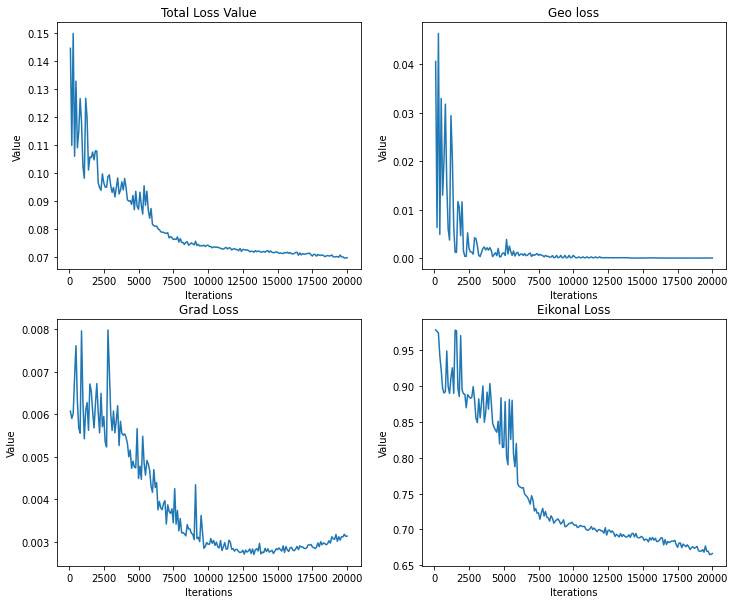

In [8]:
outfile = mp + '/figures/loss_value/' + dataset_name + '_' + constraint_name + '.npy'
model, optimizer, scheduler = Reconstruction.train(iteration,
                             model,
                             optimizer,
                             scheduler,
                             batch_size=batch_size,
                             points=dataset,
                             normal_vectors=normal_vectors,
                             loss_output_path=outfile,
                             device=device)

In [9]:
save_path = mp + '/models/' + dataset_name + '_' + constraint_name + '_' + str(prev_iteration + iteration) + '.traineddata'
Network.save_model(save_path, model, optimizer, scheduler)

In [10]:
xx, yy, zz = Visualization.grid_from_torch(dataset, resx=32, resy=32, resz=32, device=device)

In [11]:
constraint_output = None
vtk_output_path = dataset_name + '_' + constraint_name + '_' + str(prev_iteration + iteration) + '.vtk'
z = Visualization.nn_sampling(model, xx, yy, zz, 
                              constraint_output=constraint_output,
                              vtk_output_path = vtk_output_path,
                              device=device)

VTK file saved


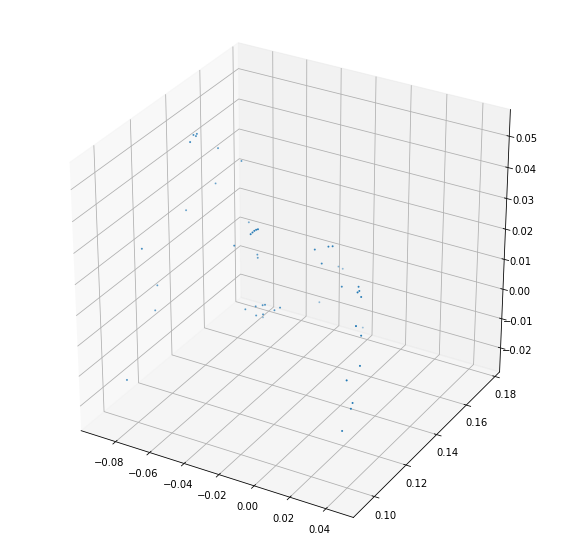

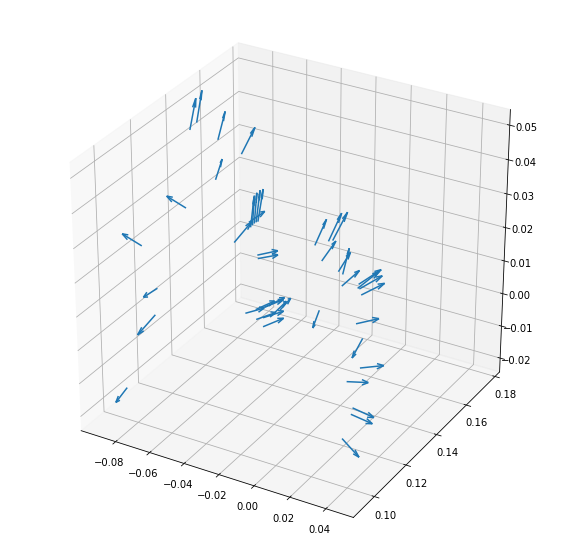

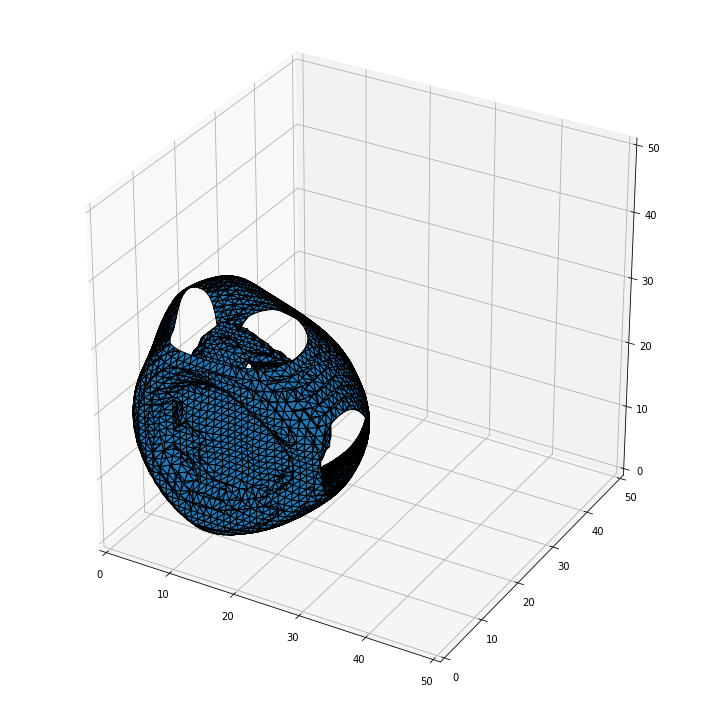

In [12]:
Visualization.visualize3(dataset[0:50,:].detach().cpu().numpy(), normal_vectors[0:50,:].detach().cpu().numpy(), z.detach().cpu().numpy())